Проанализируйте подневный график поисковой доли Яндекса на десктопе по данным Яндекс.Радара за весь доступный период. Опишите наблюдаемые закономерности, объясните и попробуйте классифицировать замеченные аномалии.

In [2]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt

In [3]:
search = pd.read_csv('/home/yulic/Jupyter/yandex/search.csv')

In [4]:
search.head()

,Время,"Rambler, Визиты","Rambler, Доля","Mail.ru, Визиты","Mail.ru, Доля","Google, Визиты","Google, Доля","Яндекс, Визиты","Яндекс, Доля","Остальные, Визиты","Остальные, Доля"
0,2015-01-01 - 2015-01-01,741225,0.009174,6446539,0.079792,20012764,0.247706,50680397,0.627293,2911330,0.036035
1,2015-01-02 - 2015-01-02,946437,0.009170,7995399,0.077463,25294959,0.245069,65303223,0.632687,3675662,0.035611
2,2015-01-03 - 2015-01-03,985794,0.008912,8552026,0.077311,27011850,0.244191,70150340,0.634168,3917910,0.035418
3,2015-01-04 - 2015-01-04,1021004,0.008947,8738732,0.076579,27816676,0.243761,72520143,0.635503,4017944,0.035210
4,2015-01-05 - 2015-01-05,1040457,0.008849,8971597,0.076303,28705422,0.244138,74754084,0.635780,4106972,0.034930


In [5]:
search.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1725 entries, 0 to 1724
Data columns (total 11 columns):
Время                1725 non-null object
Rambler, Визиты      1725 non-null int64
Rambler, Доля        1725 non-null float64
Mail.ru, Визиты      1725 non-null int64
Mail.ru, Доля        1725 non-null float64
Google, Визиты       1725 non-null int64
Google, Доля         1725 non-null float64
Яндекс, Визиты       1725 non-null int64
Яндекс, Доля         1725 non-null float64
Остальные, Визиты    1725 non-null int64
Остальные, Доля      1725 non-null float64
dtypes: float64(5), int64(5), object(1)
memory usage: 148.3+ KB


In [6]:
print(search.isna().sum(), search.duplicated().sum())

Время                0
Rambler, Визиты      0
Rambler, Доля        0
Mail.ru, Визиты      0
Mail.ru, Доля        0
Google, Визиты       0
Google, Доля         0
Яндекс, Визиты       0
Яндекс, Доля         0
Остальные, Визиты    0
Остальные, Доля      0
dtype: int64 0


In [70]:
search['date'] = pd.to_datetime(search['Время'].map(lambda x: str(x[0:10])), format='%Y-%m-%d')
search['month'] = search['date'].map(lambda x: x.strftime('%Y-%m'))
search['month_num'] = search['date'].dt.month
search['week_num'] = search['date'].dt.week
search['year'] = search['date'].dt.year


In [71]:
search.head()

,Время,"Rambler, Визиты","Rambler, Доля","Mail.ru, Визиты","Mail.ru, Доля","Google, Визиты","Google, Доля","Яндекс, Визиты","Яндекс, Доля","Остальные, Визиты","Остальные, Доля",date,month,month_num,week_num,year
0,2015-01-01 - 2015-01-01,741225,0.009174,6446539,0.079792,20012764,0.247706,50680397,0.627293,2911330,0.036035,2015-01-01,2015-01,1,1,2015
1,2015-01-02 - 2015-01-02,946437,0.009170,7995399,0.077463,25294959,0.245069,65303223,0.632687,3675662,0.035611,2015-01-02,2015-01,1,1,2015
2,2015-01-03 - 2015-01-03,985794,0.008912,8552026,0.077311,27011850,0.244191,70150340,0.634168,3917910,0.035418,2015-01-03,2015-01,1,1,2015
3,2015-01-04 - 2015-01-04,1021004,0.008947,8738732,0.076579,27816676,0.243761,72520143,0.635503,4017944,0.035210,2015-01-04,2015-01,1,1,2015
4,2015-01-05 - 2015-01-05,1040457,0.008849,8971597,0.076303,28705422,0.244138,74754084,0.635780,4106972,0.034930,2015-01-05,2015-01,1,2,2015


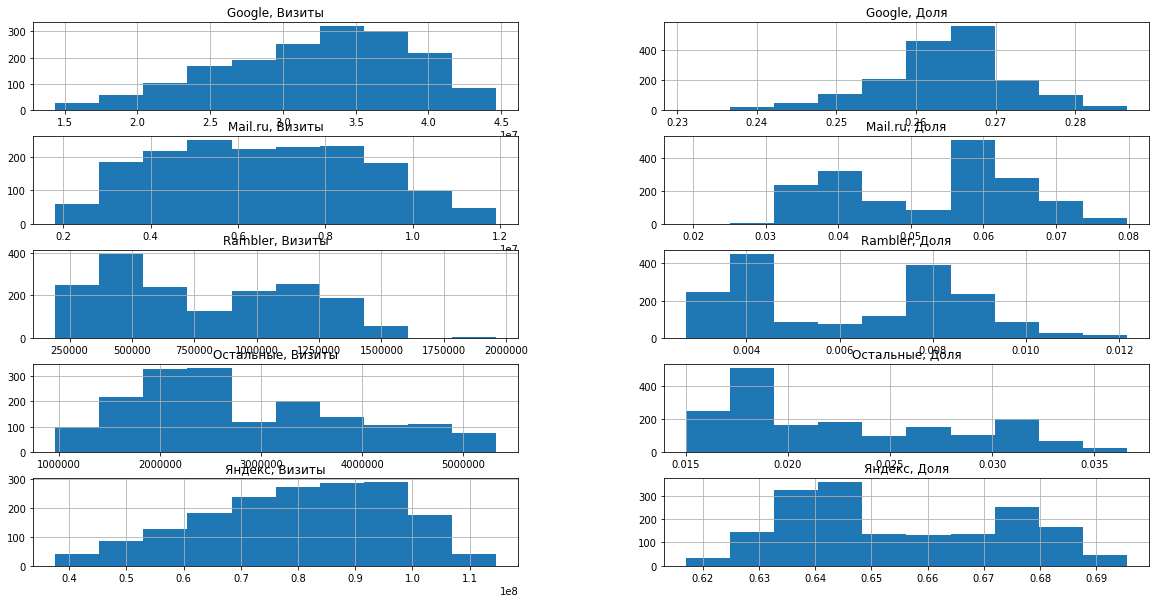

In [9]:
fig, ax = plt.subplots(nrows = 5, ncols =2 ,figsize=(20,10))

search.hist(ax=ax);



In [10]:
pd.DataFrame

pandas.core.frame.DataFrame

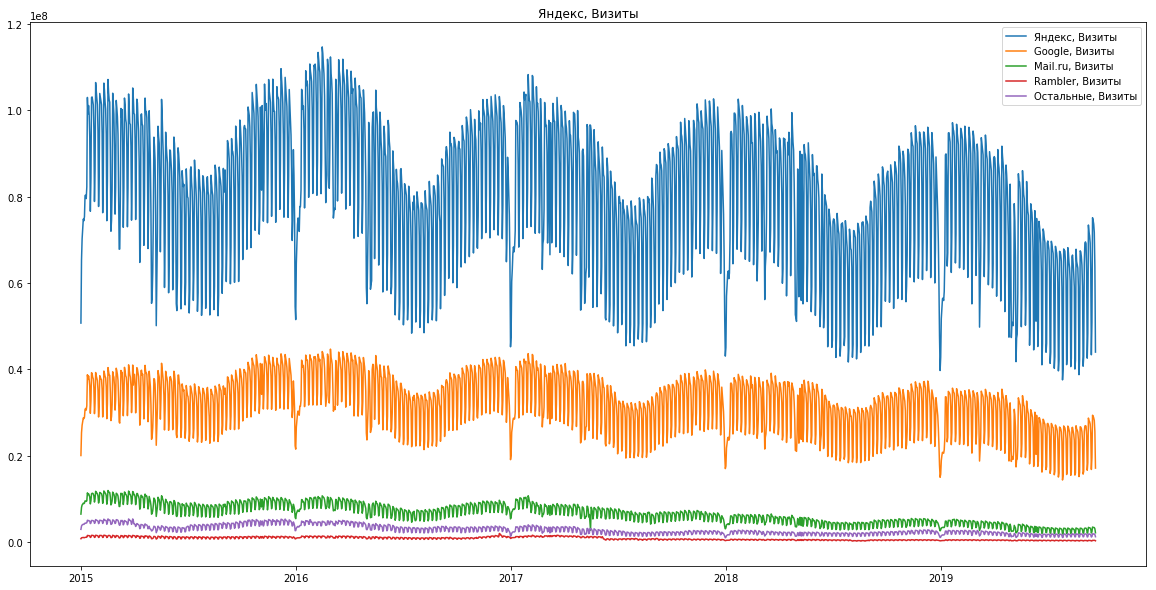

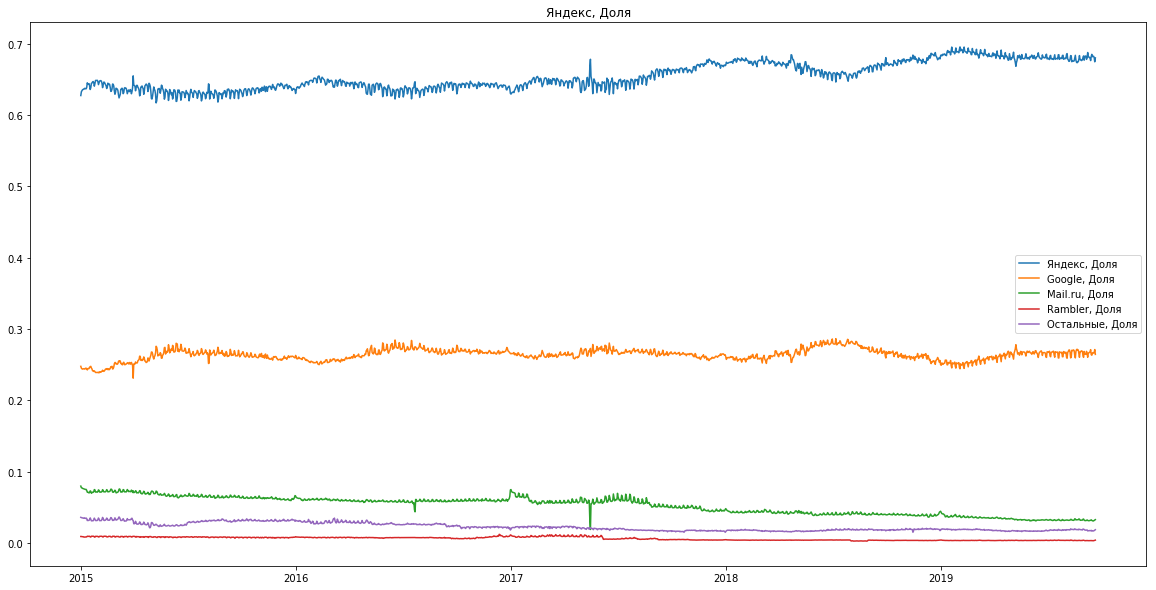

In [37]:
fig = plt.figure(figsize = (20,10))
ax1 = plt.subplot(1,1,1)
#ax1.set_xticks(search.index)
#ax1.set_xticklabels(search['month'],
#                   fontsize = 10,   #  Размер шрифта
#                   color = 'black',    #  Цвет текста
#                   rotation = 90,   #  Поворот текста
#                   verticalalignment =  'top')    #  Вертикальное выравнивание
plt.plot(
    search['date'],
    search[['Яндекс, Визиты', 'Google, Визиты', 'Mail.ru, Визиты', 'Rambler, Визиты', 'Остальные, Визиты']], 
#    label = {'Яндекс, Визиты':'2'}
);
#ax1.set_label('test')
ax1.legend(['Яндекс, Визиты', 'Google, Визиты', 'Mail.ru, Визиты', 'Rambler, Визиты', 'Остальные, Визиты'])

ax1.set_title('Яндекс, Визиты')




fig = plt.figure(figsize = (20,10))
ax2 = plt.subplot(1,1,1);
plt.plot(
    search['date'],
    search[['Яндекс, Доля', 'Google, Доля', 'Mail.ru, Доля', 'Rambler, Доля', 'Остальные, Доля']]);
#plt.plot(search['date'],search['Google, Доля']);
ax2.legend(['Яндекс, Доля', 'Google, Доля', 'Mail.ru, Доля', 'Rambler, Доля', 'Остальные, Доля'])
ax2.set_title('Яндекс, Доля');

In [48]:
month = search.groupby('month').agg(
    {'Яндекс, Визиты':'mean', 
     'Google, Визиты':'mean', 
     'Mail.ru, Визиты':'mean', 
     'Rambler, Визиты':'mean', 
     'Остальные, Визиты':'mean',
     'Яндекс, Доля':'mean', 
     'Google, Доля':'mean', 
     'Mail.ru, Доля':'mean',
     'Rambler, Доля':'mean', 
     'Остальные, Доля':'mean'
}).reset_index()
month.head()

,month,"Яндекс, Визиты","Google, Визиты","Mail.ru, Визиты","Rambler, Визиты","Остальные, Визиты","Яндекс, Доля","Google, Доля","Mail.ru, Доля","Rambler, Доля","Остальные, Доля"
0,2015-01,8.773825e+07,3.320814e+07,9.980992e+06,1.238694e+06,4.521064e+06,0.641116,0.243146,0.073395,0.009017,0.033325
1,2015-02,9.363534e+07,3.551196e+07,1.058370e+07,1.335944e+06,4.781449e+06,0.641561,0.243659,0.072717,0.009121,0.032942
2,2015-03,9.106640e+07,3.599802e+07,1.039516e+07,1.291274e+06,4.685793e+06,0.634428,0.251175,0.072626,0.008964,0.032807
3,2015-04,8.972801e+07,3.594789e+07,9.876567e+06,1.229087e+06,3.708322e+06,0.638172,0.256167,0.070431,0.008712,0.026519
4,2015-05,7.916688e+07,3.329001e+07,8.581049e+06,1.054995e+06,3.104086e+06,0.631218,0.266590,0.068826,0.008378,0.024988


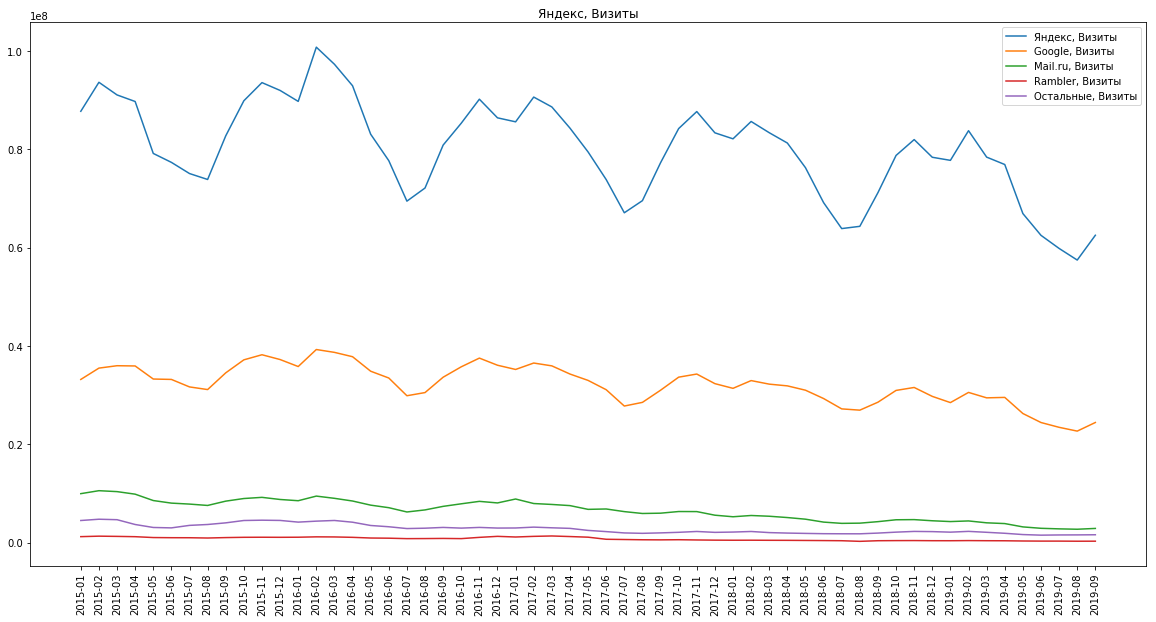

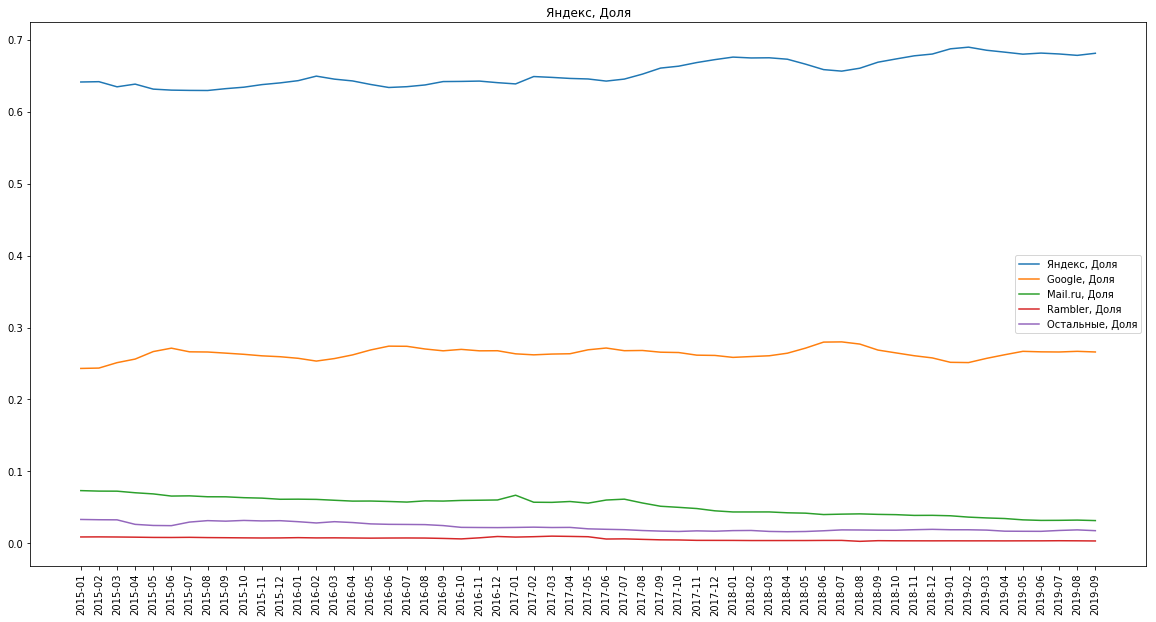

In [52]:
fig = plt.figure(figsize = (20,10))
ax1 = plt.subplot(1,1,1)
#ax1.set_xticks(search.index)
ax1.set_xticklabels(month['month'],
#                   fontsize = 10,   #  Размер шрифта
#                   color = 'black',    #  Цвет текста
                  rotation = 90,   #  Поворот текста
                  verticalalignment =  'top')    #  Вертикальное выравнивание
plt.plot(
    month['month'],
    month[['Яндекс, Визиты', 'Google, Визиты', 'Mail.ru, Визиты', 'Rambler, Визиты', 'Остальные, Визиты']], 
#    label = {'Яндекс, Визиты':'2'}
);
#ax1.set_label('test')
ax1.legend(['Яндекс, Визиты', 'Google, Визиты', 'Mail.ru, Визиты', 'Rambler, Визиты', 'Остальные, Визиты'])

ax1.set_title('Яндекс, Визиты')




fig = plt.figure(figsize = (20,10))
ax2 = plt.subplot(1,1,1);
ax2.set_xticklabels(month['month'],
#                   fontsize = 10,   #  Размер шрифта
#                   color = 'black',    #  Цвет текста
                  rotation = 90,   #  Поворот текста
                  verticalalignment =  'top')    #  Вертикальное выравнивание
plt.plot(
    month['month'],
    month[['Яндекс, Доля', 'Google, Доля', 'Mail.ru, Доля', 'Rambler, Доля', 'Остальные, Доля']]);
#plt.plot(search['date'],search['Google, Доля']);
ax2.legend(['Яндекс, Доля', 'Google, Доля', 'Mail.ru, Доля', 'Rambler, Доля', 'Остальные, Доля'])
ax2.set_title('Яндекс, Доля');

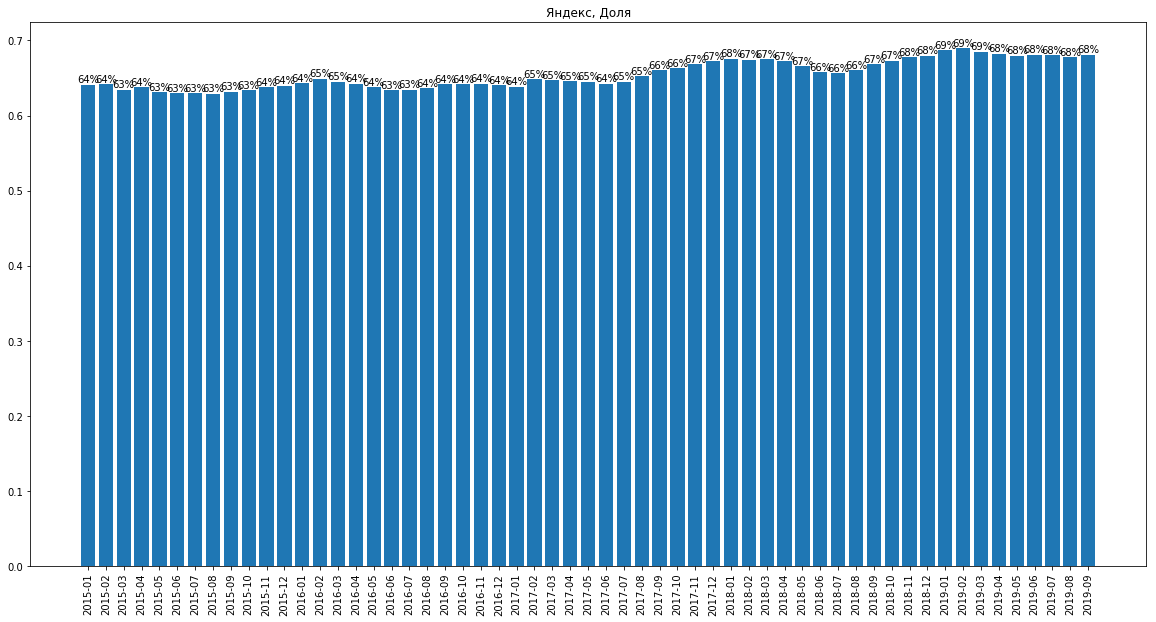

In [66]:
fig = plt.figure(figsize = (20,10))
ax1 = plt.subplot(1,1,1)
#ax1.set_xticks(search.index)
ax1.set_xticklabels(month['month'],
#                   fontsize = 10,   #  Размер шрифта
#                   color = 'black',    #  Цвет текста
                  rotation = 90,   #  Поворот текста
                  verticalalignment =  'top')    #  Вертикальное выравнивание
plt.bar(
    month['month'],
    month['Яндекс, Доля'], 
#    month[['Яндекс, Визиты', 'Google, Визиты', 'Mail.ru, Визиты', 'Rambler, Визиты', 'Остальные, Визиты']], 
#    label = {'Яндекс, Визиты':'2'}
#    ax=ax1
);
#ax1.set_label('test')
#ax1.legend('Яндекс, Доля')

ax1.set_title('Яндекс, Доля')

for p in ax1.patches: 
    ax1.text(p.get_x() + p.get_width()/2 ,
            p.get_y() + p.get_height(),
            '{:.0%}'.format(p.get_height()), 
            fontsize=10,
            color='black',
            ha='center',
            va='bottom',
           )

In [73]:
year2015 = search[(search['date']>='2015-01-01') & (search['date']<='2015-12-31')]
year2016 = search[(search['date']>='2016-01-01') & (search['date']<='2016-12-31')]
year2017 = search[(search['date']>='2017-01-01') & (search['date']<='2017-12-31')]
year2018 = search[(search['date']>='2018-01-01') & (search['date']<='2018-12-31')]
year2019 = search[(search['date']>='2019-01-01') & (search['date']<='2018-12-31')]


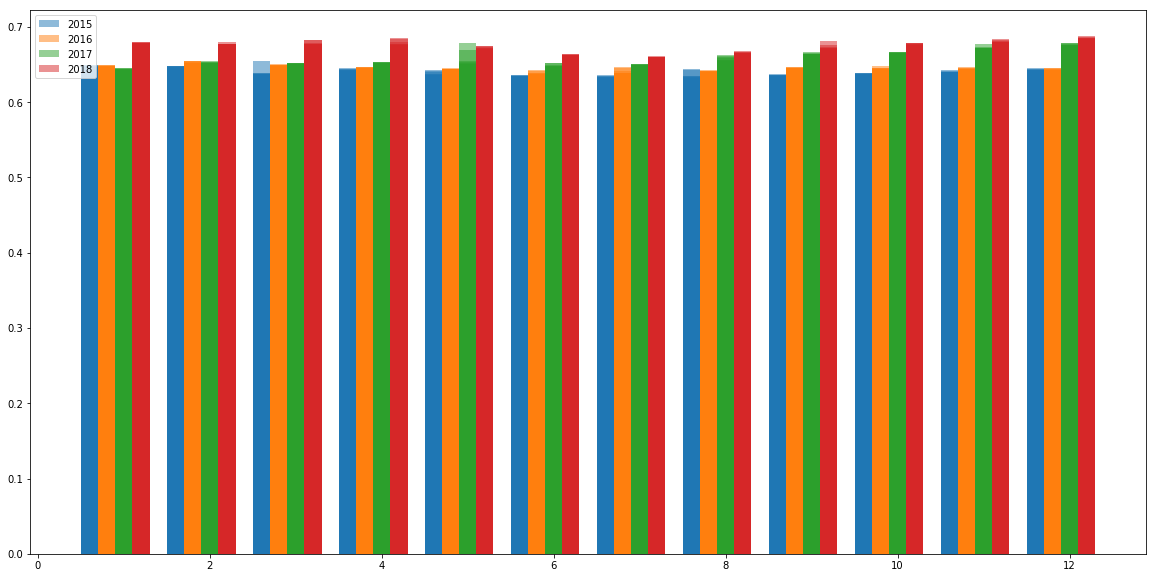

In [92]:
fig = plt.figure(figsize = (20,10))
ax1 = plt.subplot(1,1,1)
plt.bar(year2015['month_num']-.4,year2015['Яндекс, Доля'], label='2015', alpha=.5, width=.2);
plt.bar(year2016['month_num']-.2,year2016['Яндекс, Доля'], label='2016', alpha=.5, width=.2);
plt.bar(year2017['month_num'],year2017['Яндекс, Доля'], label='2017', alpha=.5, width=.2);
plt.bar(year2018['month_num']+.2,year2018['Яндекс, Доля'], label='2018', alpha=.5, width=.2);
plt.bar(year2019['month_num']+.4,year2019['Яндекс, Доля'], alpha=.5, width=.2);
#ax1.set_title('Яндекс, Доля по годам')
ax1.legend()


### Поисковая доля
#### При анализе поисковой доли наблюдается:
1. Плавный прирост от 64% (среднемесячный показатель) до 68% (текущий показатель), в сентябре 2009 значение доходило до 69%
2. С февраля 2017 года поисковик яндекс показал умереннный рост по устройствам десктоп от 64 до 69% (09-2019). Прирост был обеспечен за счет отъедания доли у поисковиков google и mail.ru
3. Вместе с тем, видна зависимость при приростах / падениях поисковика google - yandex показывает аналогичные пдения / приросты в противофазе:
    - сентябрь 2017 - февраль 2018 - яндекс на подъеме / гугл в падении, март 2018 - август 2018 - яндекс падает / гугл растет (термины падени / рост - относительные - рост доли (среднемесячная) с 64% до 67%, падение с 68% до 66%)
    - 


### Визиты:
#### При анализе визитов наблюдается
1. ярко выраженная сезонность:
    - рост начиная с сентября
    - пик посещаемости в декабре
    - сильно падение в новогодние праздники, майские праздники
    - спад с декабря до минимума в июне-июле
2. Тренд на снижение по количеству визитов от устройств "desktop" для всех поисковых систем
3. С середины 2018 года поисковик яндекс показал умереннный рост по устройствам десктоп. Прирост был обеспечен за счет падения поисковика google и mail.ru